In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r'Titanic-Dataset.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [19]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [29]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Name']=le.fit_transform(df['Name'])

In [33]:
st=StandardScaler()
num_cols=['Age','Fare']
df[num_cols]=st.fit_transform(df[num_cols])

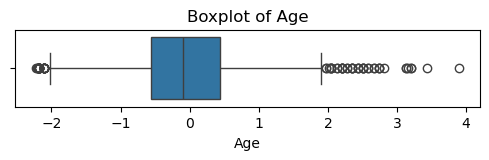

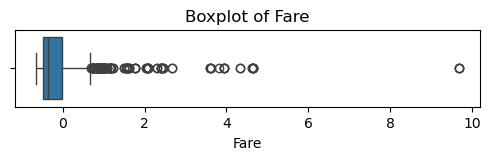

In [39]:
for col in num_cols:
   plt.figure(figsize=(6,1))
   sns.boxplot(x=df[col])
   plt.title('Boxplot of '+ col)
   plt.show()

In [43]:
def remove_outliers(df,columns):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

for col in num_cols:
    print("Shape after removing outliers:", df.shape) 

Shape after removing outliers: (891, 11)
Shape after removing outliers: (891, 11)


In [47]:
print("\nFinal Info:\n",df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 73.2+ KB

Final Info:
 None
   PassengerId  Survived  Pclass  Name  Sex       Age  SibSp  Parch  \
0            1         0       3   108    1 -0.565736      1      0   
1            2         1       1   190    0  0.663861      1      0   
2            3         1       3   353    0 